# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data (Importing data)
df = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/Assignment_1_FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [33]:
# Write your code here
df.shape # Checking the shape of data

(1898, 9)

#### Observations:


*   There are 1898 rows and 9 columns in the dataset





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [34]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


 #### Observations:


*   All columns have 1898 observations which indicates that there are no missing values in any of the columns
*   There are 5 numerical columns ( 4 integer data type and 1 float data dype) in the data and 4 object type columns
*   Eventhough the values appear as numbers, Order ID (order_id) and Customer ID (customer_id) columns can be treated as object data type as the vaules does not contain any numerical meaning
*   rating and day_of_the_week columns should be categorical variables.














In [35]:
# Changing the data types of columns order_id and cumtomer_id
df['order_id'] = df['order_id'].astype(object)
df['customer_id'] = df['customer_id'].astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [36]:
# Write your code here
df.isnull().sum() # Checking the count of missing values in all the columns

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
According to the output it indicates there are no missing values in any of the columns.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [37]:
# Write your code here
df.describe().T # Transpose of statistical summary of all numerical variables

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:

Minimum, average, and maximum time it takes for food to be prepared once an order is placed (in minutes)
*   Minimum = 20
*   Average = 27.371970
*   Maximum = 35






In [38]:
df.describe(include='all').T # Transpose of statistical summary of all the variables

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,1898.0,1477147.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,1898.0,1200.0,52832.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


### **Question 5:** How many orders are not rated? [1 mark]

In [39]:
# Write the code here
df['rating'].value_counts() # counting the unique values in the column 'rating'

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are 736 not rated orders available in the data set


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [40]:
# Write the code here
# Column 1: order_id: Unique ID of the order (non numeric)
df['order_id'].nunique()

1898

####Observations:
Order Id is unique as it is given to distinguish each order. Therefore there are 1898 unique values which equals to the number of rows in the dataset

In [41]:
# Column 2: customer_id: ID of the customer who ordered the food (non numeric)
df['customer_id'].nunique()

1200

####Observations:
There are 1200 unique cutomer ids among 1898 number of orders in the dataset indicates that there are multiple orders placed by one or more customers.

In [42]:
# Column 3: restaurant_name: Name of the restaurant (Nominal)
df['restaurant_name'].nunique()

178

In [43]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
# code for creating bar chart for column resaurant_name
#plt.figure(figsize = (20, 5))
#sns.countplot(x='restaurant_name', data = df)
#plt.xlabel('restaurant name')
#plt.ylabel('count')
#plt.xticks(rotation=90);



####Observations:
There are 178 different restaurants are present in this dataset.Among them Shake Shack appears more frequently within 219 orders.It is possible to visualize data in a bar chart but due to the high number of categories it doesnt seem to be visually appealing.

In [44]:
# Column 4: cuisine_type: Cuisine ordered by the customer (Nominal)
df['cuisine_type'].value_counts() # Counting the popularity of all cuisines

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [45]:
a1= df[df['cuisine_type'] == 'American'] # Identifying restaurants offering most popular cuisine
a1['restaurant_name'].value_counts()

Shake Shack                    219
Blue Ribbon Fried Chicken       96
Five Guys Burgers and Fries     29
Bareburger                      27
The Meatball Shop               20
The Smile                       18
J. G. Melon                     15
Westville Hudson                15
P.J. Clarke's                   15
Burger Joint                    12
S'MAC                           12
Melt Shop                       11
Cafeteria                        9
Waverly Diner                    7
Sarabeth's East                  7
Sarabeth's Restaurant            7
Lucky's Famous Burgers           6
5 Napkin Burger                  5
Delicatessen                     5
Five Leaves                      4
Dirty Bird to Go                 4
Blue Ribbon Brooklyn             4
Friend of a Farmer               3
Dickson's Farmstand Meats        3
Sarabeth's                       3
Schnipper's Quality Kitchen      3
Bubby's                          3
Dirty Bird To Go (archived)      3
The Odeon           

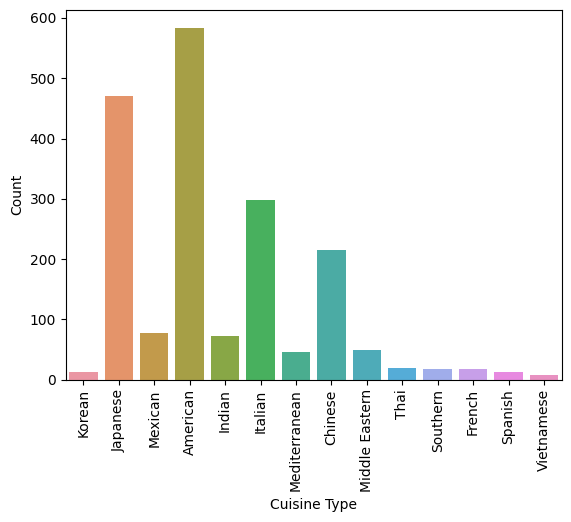

In [46]:
#creating bar chart for cusine_type
#plt.figure(figsize = (15,5)) #  size of the plot can be increased using this method
sns.countplot(data = df, x = 'cuisine_type') # Ploting the bar graph using countplot() function of seaborn
plt.xlabel('Cuisine Type') # labeling x axis
plt.ylabel('Count') # labeling y axis
plt.xticks(rotation= 90); # rotate the tick marks  on the x axis to make it look better and to avoid overlapping

####Observations:


*   There are 14 different cuisine types being ordered and among them 'American' appears at the top and Vietnamese at the bottom in terms of frequency.
*   We can identify that Japanese, American, Italian and Chinese cuisines have relatively higher preference in this data set
*   Shake Shak restaurant appears to be the most popular restaurant for american cuisine






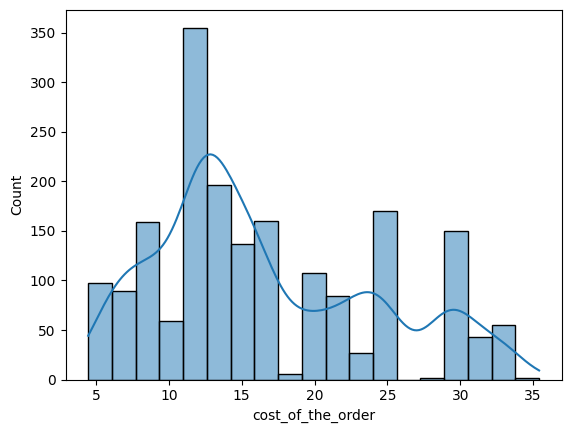

In [47]:
# Column 5: cost: Cost of the order (Continuous variable)
sns.histplot(data=df,x='cost_of_the_order',kde=True) # Histogram for the cost of order
plt.show()


####Observations:
Data is not narmal but appears to be slightly positive skewed.



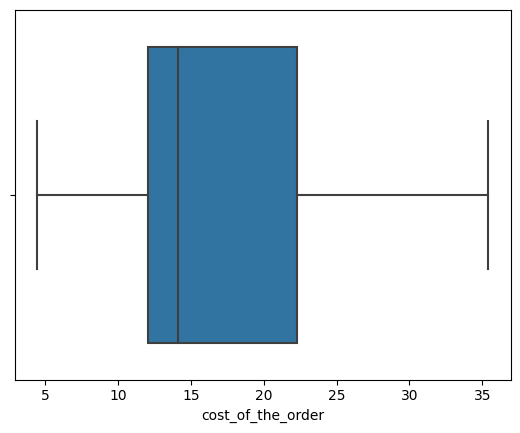

In [28]:
sns.boxplot(data=df,x='cost_of_the_order') # Boxplot for the cost of order
plt.show()


####Observations:

*   In the box-plot, median is closer to 14 dollars and 50% of oreders cost around 12  to 22 dollars
*   There are no outliers present in cost of the order variable






In [48]:
# Column 6: day_of_the_week: Indicates whether the order is placed on a weekday or weekend (Categorical)
df['day_of_the_week'].value_counts() # checking number of occurences of unique values in the column day_of_the week


Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

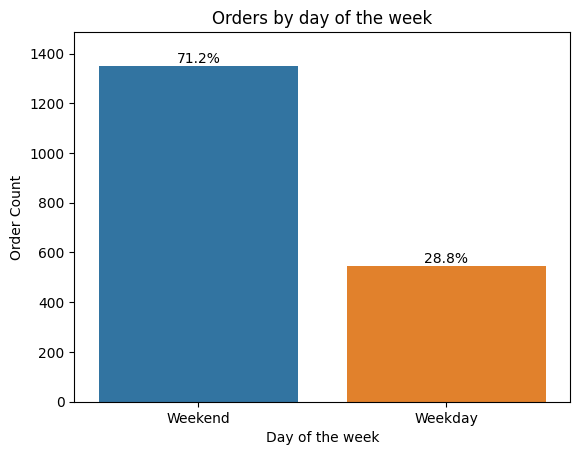

In [53]:
ax = sns.countplot(x = 'day_of_the_week', data = df ) # Creating bar chart to visualize weekend and weekday order counts
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%') # annotate the bars with fmt from matplotlib
ax.margins(y=0.1) #add space at the end of the bar for the labels
ax.set(xlabel='Day of the week', ylabel='Order Count', title='Orders by day of the week') # Setting x, y axis labels and chart title
plt.show()

####Observations:


*   71.2% of orders comming during weekend
*   Weekend orders appears to be more than two times of weekday orders.
*   Demand of online food orders are far higher during weekends.




In [61]:
# Column 7: rating: Rating given by the customer out of 5 (Categorical)
df['rating'].value_counts() # Getting counts of each unique rating value in the data set

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

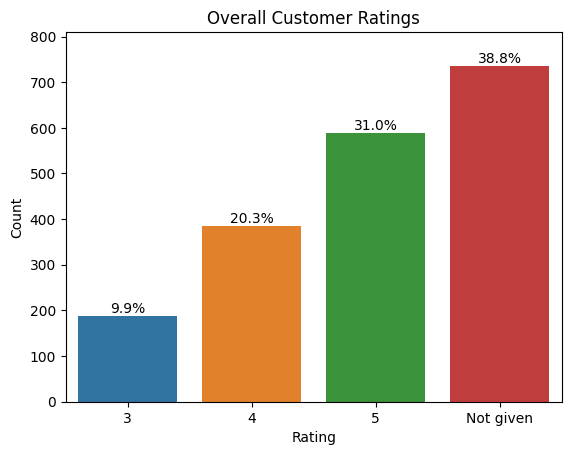

In [52]:
ax = sns.countplot(data=df, x = 'rating', order=['3' , '4' , '5','Not given']) # Creating a bar chart to plot count of ratings in acsending order
total = df['rating'].count() # total count of rating column
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%') # annotate the bars with fmt from matplotlib
ax.margins(y=0.1) #add space at the end of the bar for the labels
ax.set(xlabel='Rating', ylabel='Count', title='Overall Customer Ratings') # Setting x, y axis labels and chart title
plt.show()




####Observations:
*   38.8% of  orders are not rated  
*   9.9% of orders are rated as 3
*   Around half of the orders are rated as either 4 or 5

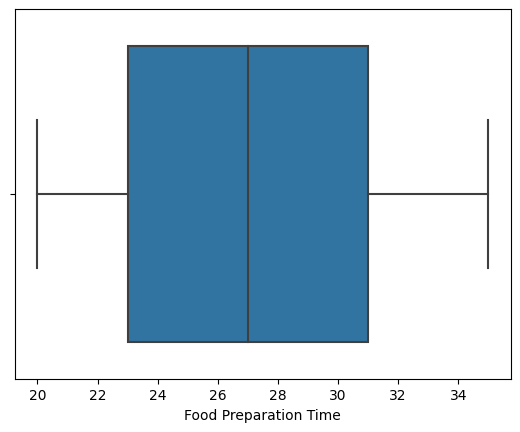

In [65]:
# Column 8: food_preparation_time: Time (in minutes) (Continuous variable)
sns.boxplot(data = df, x = 'food_preparation_time') # Box-plot for food preperation time
plt.xlabel('Food Preparation Time');


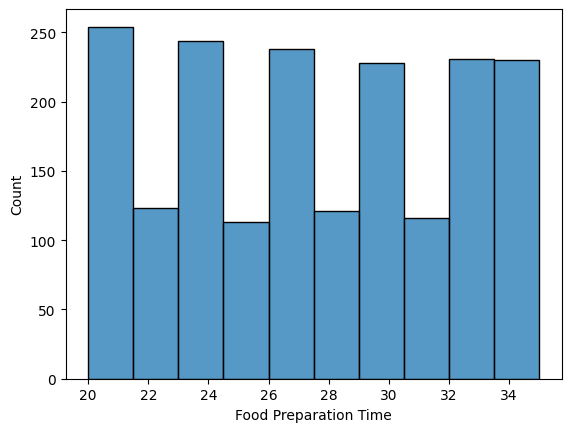

In [70]:
sns.histplot(data = df, x = 'food_preparation_time', bins =10) # Histogram for food preperation time
plt.xlabel('Food Preparation Time')
plt.ylabel('Count');

####Observations:


*   Data appears to be a Uniform distribution
*   Food Preparation Time seems to be a multimodal data set



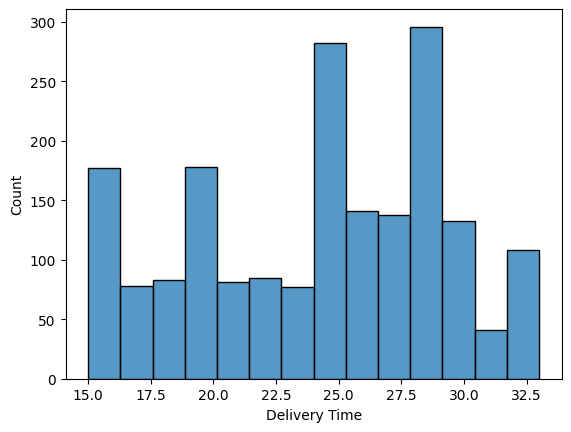

In [72]:
# Column 9: delivery_time: Time (in minutes) (Continuous variable)
sns.histplot(data = df, x= 'delivery_time')
plt.xlabel('Delivery Time')
plt.ylabel('Count');

####Observations:
*   Data is not normally distributed



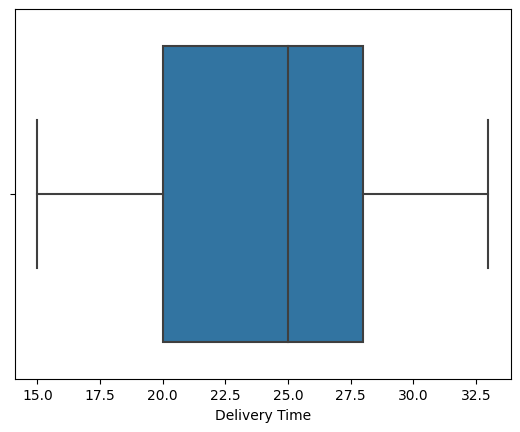

In [75]:
sns.boxplot(data = df, x ='delivery_time')
plt.xlabel('Delivery Time');

####Observations:

*   There are no outliers present
*   25% of orders are delivered within less than 20 minutes
*   50% of orders take 20 to 28 minutes to be delivered
*   75% of orders are delivered in less than around 28 minutes
*   Maximum time it takes an order to be delivered is around 33 minutes







### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [35]:
# Write the code here
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
Shake Shack (219)The Meatball Shop (132) Blue Ribbon Sushi(119) Blue Ribbon Fried Chicken (96) Parm (68) are top five restaurants in terms of number of orders received


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [44]:
# Write the code here
pd.crosstab(df['cuisine_type'],df['day_of_the_week']) #Method 1


day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Chinese,52,163
French,5,13
Indian,24,49
Italian,91,207
Japanese,135,335
Korean,2,11
Mediterranean,14,32
Mexican,24,53


In [45]:
df_weekend = df[df['day_of_the_week'] == 'Weekend'] #Method 2
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American is the most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [56]:
# Write the code here
sub_set = df[df['cost_of_the_order']>20] # data set having order cost greater than $20
total_set = df.shape[0] # df.shape[0] returns number of rows in df

print('Percentage of the orders cost more than $20 = ',round((sub_set.shape[0]/total_set)*100,2), '%')

Percentage of the orders cost more than $20 =  29.24 %


#### Observations:

29.24 % of orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [57]:
# Write the code here
mean_order_delivery_time = df['delivery_time'].mean()

print('Mean order delivery time in minutes = ',round(mean_order_delivery_time,2))

Mean order delivery time in minutes =  24.16


#### Observations:

Mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [58]:
# Write the code here
top_three = df['customer_id'].value_counts() # getting number of occurences of each customer id
top_three[0:3] # retreiving only first three rows

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customers who have customer Ids
1.   52832 (13 orders)
2.   47440 (10 orders)
3.   83287 (9 orders) will receive 20 % discount vouchers




### Multivariate Analysis

In [13]:
import plotly.express as px

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


###Relationship of 'rating' with 'delivery time', 'cost of order', 'food preparation time' and 'cuisine type'





**Relationship between rating  and delivery time**

<Axes: xlabel='rating', ylabel='delivery_time'>

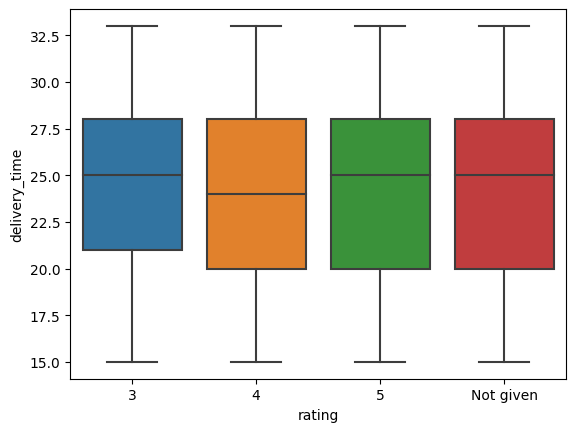

In [12]:
#Relationship between rating  and delivery time using box plot
sns.boxplot(df, x = 'rating', y = 'delivery_time', order = ['3','4','5','Not given'])


####Observations:
75% of orders are delivered within around 28 minutes regardless of rating

<function matplotlib.pyplot.show(close=None, block=None)>

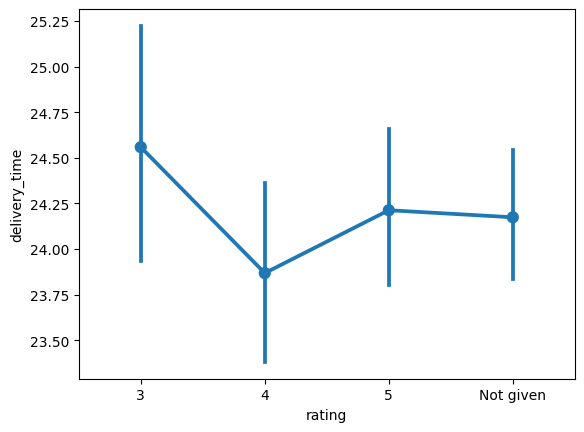

In [16]:
#Relationship between rating  and delivery time using scatter plot
sns.pointplot(data = df, x = 'rating', y = 'delivery_time',order = ['3','4','5','Not given'])
plt.show

####Observations:
Extended delivery time has led to lower ratings


**Relationship between rating   and cost of order**

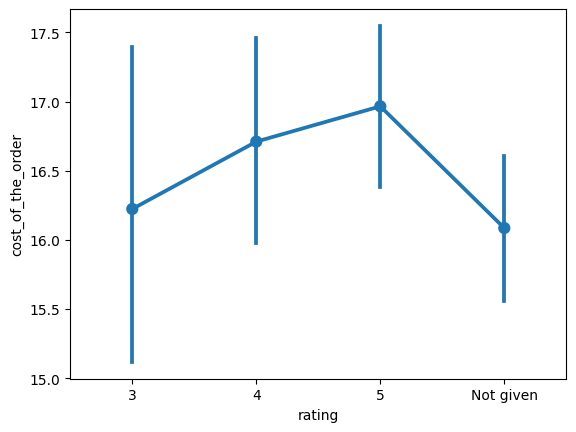

In [32]:
#POint plot of relationship between rating   and cost of order
#plt.figure(figsize = (20, 7))
sns.pointplot(df, x='rating', y ='cost_of_the_order', order = ['3','4','5','Not given']);


####Observations
Except not rated orders, when cost of order getting higher customer ratings also tend to increase

**Relationship between rating and food preperation time**

<Axes: xlabel='rating', ylabel='food_preparation_time'>

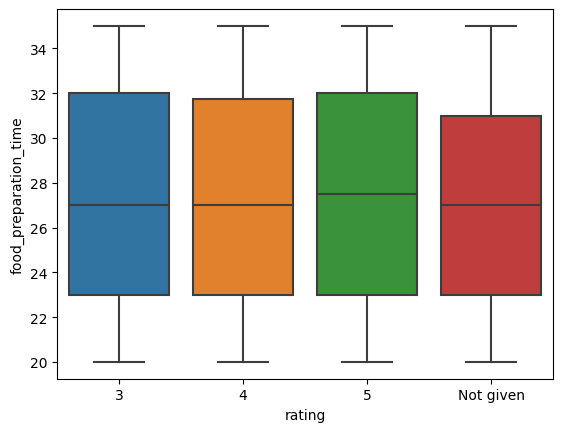

In [7]:
#Box plot for the relationship in between rating and food preperation time
sns.boxplot(data=df, x='rating', y='food_preparation_time',order = ['3','4','5','Not given'])

####Observations:


*   Regardless of rating category 25% of orders require around 23 minutes of food preperation time
*   Except rating 5 category, all other rating categories have almost same median food preperation time



<Axes: xlabel='rating', ylabel='food_preparation_time'>

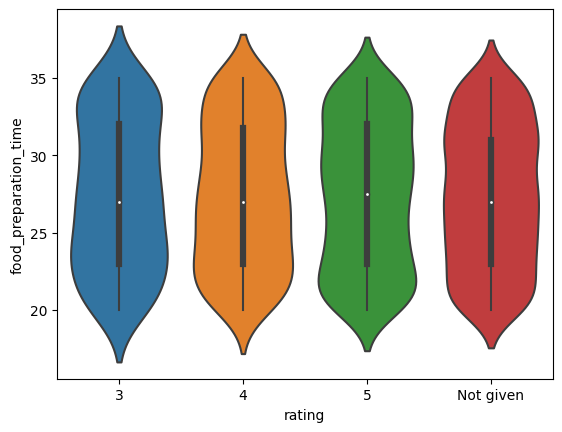

In [13]:
# Violin plot for the relationship in between rating and food preperation time
sns.violinplot(data=df, x='rating', y='food_preparation_time',order = ['3','4','5','Not given'])

####Observations:


*   Food preperation time appears to be equally distrubuted among different rating categories
*   There is no significant relationship visually observed in between food preperation time and rating


**Relationship between rating and cuisine type**

In [18]:
#Relationship between rating and cuisine type
rating = df[df['rating']!= 'Not given'].copy() # Creating a subset of df having records rating given
rating['rating'] = rating['rating'].astype(int) # converting the column data type to integer
rating.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False) # Calculating the average rating for each cuisine type


cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64

####Observations:
*   Among all cuisine types Spanish cuisine appers to be the top rated cuisine on average
*   All averages are above 4 points



###Relationship of 'cuisine type' with cost of order and food preparation time



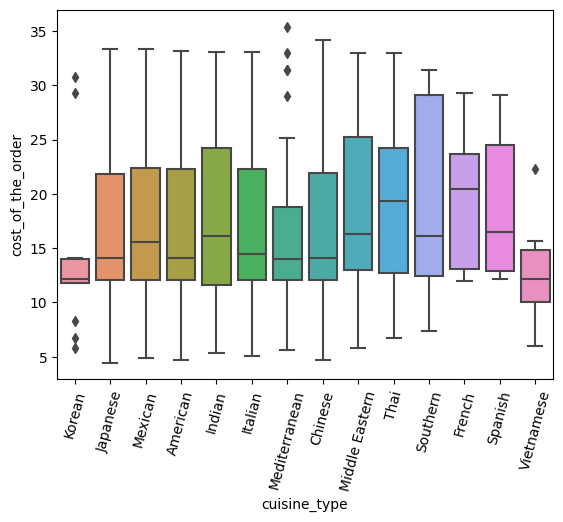

In [56]:
# Box Plot for relationship between cuisine type and cost of order
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation = 75);

####Observations:


*   Outliers can be observed in Korean, Mediterranean and Vietnamese cuisines only.
*   Korean cuisine seems cheaper than other types
*   Except Korean and Vietnamese cuisines, other cuisine types have a somewhat similar price ranges
*   Price variation is comparatively lower in Korean food & Vietnamese food






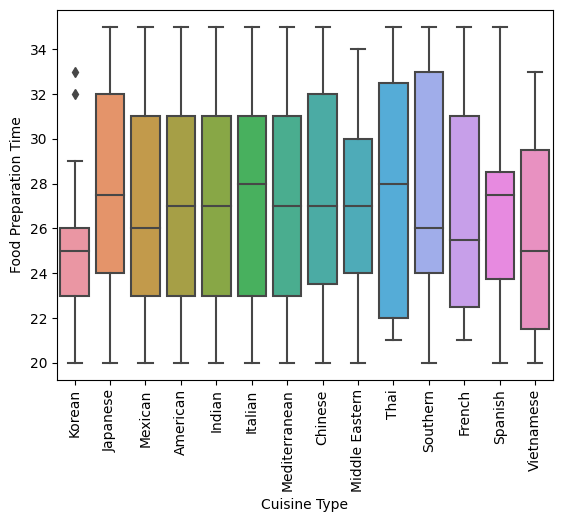

In [8]:
#Box plot for relationship between cuisine type and food preparation time
sns.boxplot(df, x='cuisine_type', y='food_preparation_time')
plt.ylabel('Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 90);

####Observations

*   Overall Korean cuisine seems to have a short preparation time comparaed to other types and having outliers.
*   Mexican, American, Indian, Italian and Mediterranean cuisine preparation time appears to be somewhat similar except median time
*   Among them American, Indian and Mediterranean cuisines food preperation time distributions appears to be identical and normally distributed
*   Variation of Korean food preperation time is lower compared to other cuisine types and outlier present








###Relationship of 'day of the week' and 'delivery time'



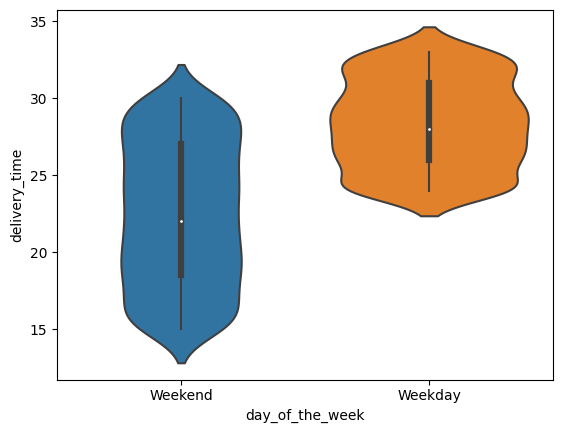

In [29]:
#Violin plot for relationship between day of the week and delivery time
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time', orient='v');

####Observations:


*   Weekday delivery time appears to be much higher than weekend delivery time.
*   Average delivery time in weekdays are higher than weekend
*   Variation of weekend delivery time is higher than weekdays






###Correlation among numerical variables





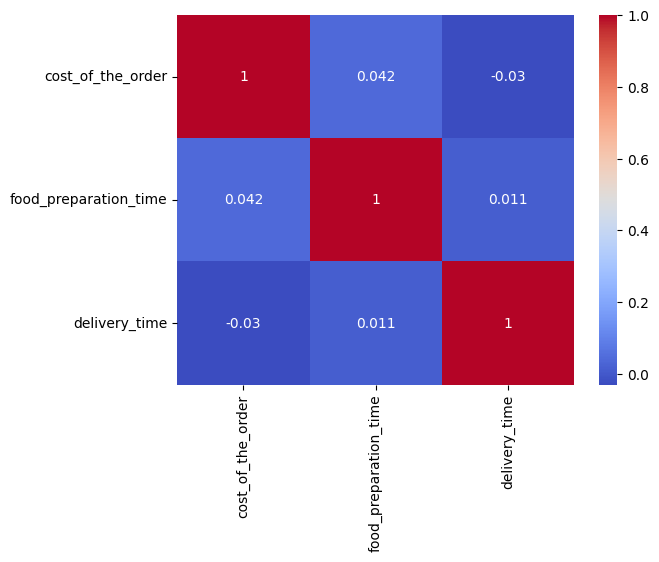

In [41]:

# Correlation among variables
sns.heatmap(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm');

####Observations:


*   Delivery time and cost of the order seems to have a weak negative correlation
*   Food preparation time also appears to have a weak positive correlation with cost of the order and delivery time

According to the heatmap there is no significant positive or negative correlation in between cost, delivery time and food preparation time is observed

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [33]:

# Write the code here
rating_set = df[df['rating']!= 'Not given'].copy() # creating a subset of data without rating = 'Not given'
rating_set['rating']= rating_set['rating'].astype('int') # converting the data type of rating column to integer for future arithmatic operations

new_df1 = rating_set.groupby('restaurant_name')['rating'].count().sort_values(ascending = False)  # getting rating count grouped by resaurant name

new_df2 = rating_set.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False) # getting rating mean values grouped by restaurant name

new_df3 = pd.merge(new_df1,new_df2,how='inner',on='restaurant_name') # merging two data sets to construct a new data view with restaurant name, rating count and average rating

new_df4 = new_df3[(new_df3['rating_x']>50) & (new_df3['rating_y']>4)] # Filter only restaurant names which are having rating count>50 and average rating >4
new_df4 # view result


,rating_x,rating_y
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:

Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop are the restaurants which are eligiblr to the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [21]:
# Write the code here
net_revenue = 0
for each in df['cost_of_the_order']:

  if each>20:
    commision = each*0.25
  elif each>5:
    commision = each*0.15
  else:
    commision = each*0

  net_revenue += commision

print("Net Revenue = ", round(net_revenue,2), 'dollars')

Net Revenue =  6166.3 dollars


#### Observations:
Net Revenue = 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [44]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time'] # calculating the total time and add that as a new column to the data set

total_greater_than_60 = df[df['total_time']>60].shape[0] # number of rows in the dataset having total time greater than 60 minutes
total_data = df.shape[0] # total number of rows in the data set
print('Percentage of orders take more than 60 minutes = ',round((total_greater_than_60/total_data )*100,2),'%')
#df.describe()

Percentage of orders take more than 60 minutes =  10.54 %


#### Observations:
10.54 % of orders take more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [59]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
Mean delivery time during weekday is 28.34 minutes while 22.47 during weekends. We can observe a 6 minutes earlier average delivery time during weekends

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
We have analysed a dataset consisting of 1898 rows described in 9 columns of a food aggregator company which has stored the data of the different orders made by the registered customers in their online portal.Data represent different orders placed in 178 restaurants over 14 different cuisine types during weekdays and weekends along with their customer ratings and some more information. As the food aggregator company wants to analyze the data to get a fair idea about the demand of different restaurants in order to enhance the customer experience, the main attribute that we can focus is ratings of orders given by customers.Further, it is necessary to emphasize that the dataset is not adequate to create the real picture of customer experience as it is lack of some important information about range of 'rating'. Data consisting of only {Not given, 5, 4, 3} as values of column 'rating'
Therefore by analyzing available data we could make following conclusions.
1. FoodHub is capable of delivering an order to a customer within 35 to 68 minutes once the customer has confirmed the order
2. Shake Shack appears to be the most polular restaurant in this dataset
3. The most popular cuisine type is American and shake shak restaurant appears at the top of providing it.
4. Demand for orders getting more than two times higher during weekend  compared to weekdays.
5. Delivery time quite longer during weekdays compared to weekend
6. Rating appears to be affected by food delivery and cost of the order
but not significantly with food preparation time and cuisine type
7. There is no significant positive or negative correlation in between variables cost, delivery time and food preparation time
8. Variation of both cost and food preperation time is lower in Korean food
9. Spanish cuisine having the highest average rating from available ratings


### Recommendations:

1. Demand for American cuisine is higher during weekend and delivery assignments should be monitored to enhance customer satisfaction
2. Delivery time is longer during weekdays and availabilty of food aggregrators must be ensured during the weekdays
3. Rating orders needs to be encouraged as it is the key to identify customer satisfaction of the service
4. Restaurants providing spanish cuisine appears to satisfy customers more than others therefore more promotional offers can be given to those restaurants
5. Rating is affected by food delivery time mainly and more invetment could be made to improve food delivery
6. Rating is affected by cost of the food also therefore an optimal model should be designed to decide the percentages of company charges over cost of food.

---